按照以下步骤种植森林。

a.继续之前的练习，生产1000个训练集子集，每个子集包含随机挑选的100个实例。提示：使用Scikit-Learn的ShuffleSplit类来实现。

b.使用前面得到的最佳超参数值，在每个子集上训练一棵决策树。在测试集上评估这1000棵决策树。因为训练集更小，所以这些决策树的表现可能比第一棵决策树要差一些，只能达到约80%的精度。

c.见证奇迹的时刻到了。用每个测试集实例，生成1000棵决策树的预测，然后仅保留次数最频繁的预测［可以使用SciPy的mode()函数］。这样你在测试集上可获得大多数投票的预测结果。

d.评估测试集上的这些预测，你得到的准确率应该比第一个模型更高（高出0.5%～1.5%）。恭喜，你已经训练出了一个随机森林分类器！

In [3]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=10000, noise=0.4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape[0],y_test.shape[0]

(8000, 2000)


Ensemble test set accuracy: 86.20%


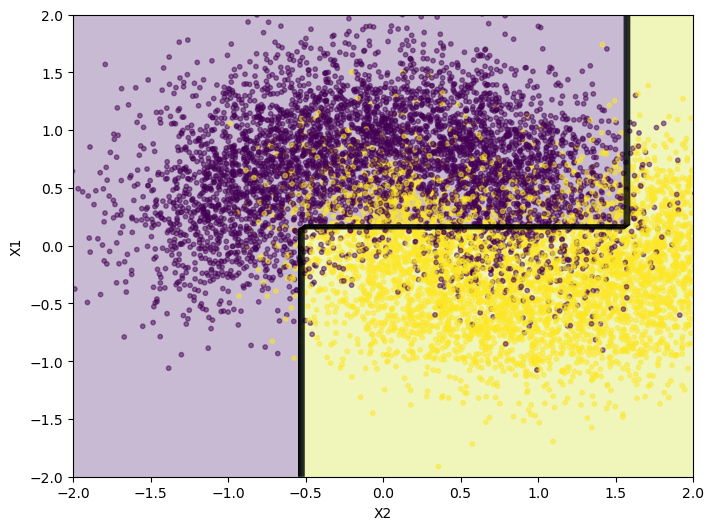

In [6]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import ShuffleSplit

shuffle = ShuffleSplit(n_splits=1000, train_size=100, random_state=42)

best_params = {'max_depth': None, 'max_leaf_nodes': 5, 'min_samples_split': 2}
# 存储所有决策树的预测
all_predictions = np.zeros((len(X_test), 1000), dtype=np.int32)
forest = list()
# b. 在每个子集上训练决策树并在测试集上预测
for i, (train_idx, _) in enumerate(shuffle.split(X_train)):
    # 创建子集
    X_train_subset = X_train[train_idx]
    y_train_subset = y_train[train_idx]
    
    tree = DecisionTreeClassifier(random_state=42, **best_params)
    tree.fit(X_train_subset, y_train_subset)
    forest.append(tree)
    
    all_predictions[:, i] = tree.predict(X_test)
 
# 使用scipy.stats.mode获取最频繁的预测
majority_predictions, _ = mode(all_predictions, axis=1)
majority_predictions = majority_predictions.ravel()  # 展平数组

# d. 评估投票预测的性能
ensemble_accuracy = accuracy_score(y_test, majority_predictions)
print("\nEnsemble test set accuracy: {:.2f}%".format(ensemble_accuracy * 100))
 

def plot_decision_boundary(model, X, y, axes=[-2, 2, -2, 2], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = model.predict(X_new).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3)
    if contour:
        plt.contour(x1, x2, y_pred, colors='k', linewidths=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=10, alpha=alpha)
    plt.axis(axes)

plt.figure(figsize=(8, 6))
plot_decision_boundary(forest[-1], X, y)
plt.xlabel("X2")
plt.ylabel("X1")
plt.show()